<a href="https://colab.research.google.com/github/aluqbnle/ml-sandbox/blob/master/22_Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 特徴量エンジニアリング

特徴量エンジニアリングによって線形アルゴリズムの性能の向上が見込める.

In [0]:
import numpy
from matplotlib import pyplot
from pandas import DataFrame
from sklearn.datasets import load_boston

# pyplot.rcParams['font.family'] = 'IPAPGothic'

In [0]:
boston = load_boston()
X = boston.data  # 特徴量
y = boston.target  # 目的変数
feature_names = boston.feature_names  # 特徴量名

df = DataFrame(data=X, columns=feature_names)
df['MEDV'] = y  # 目的変数

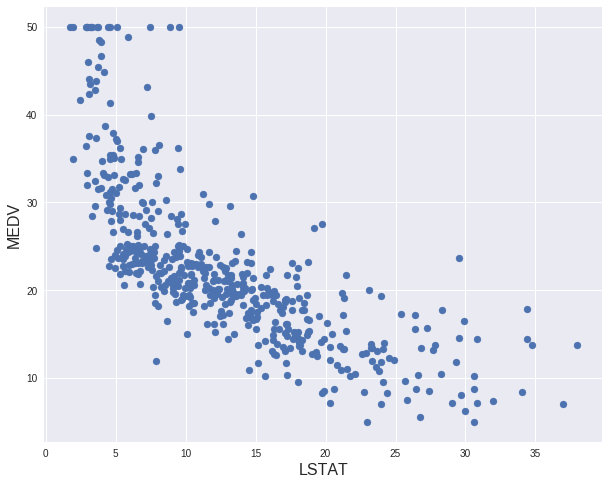

In [3]:
fig = pyplot.figure(figsize=(10, 8))

# 散布図のプロット
pyplot.scatter(df['LSTAT'].values, df['MEDV'].values)

pyplot.xlabel('LSTAT', fontsize=16)
pyplot.ylabel('MEDV', fontsize=16)
pyplot.show()

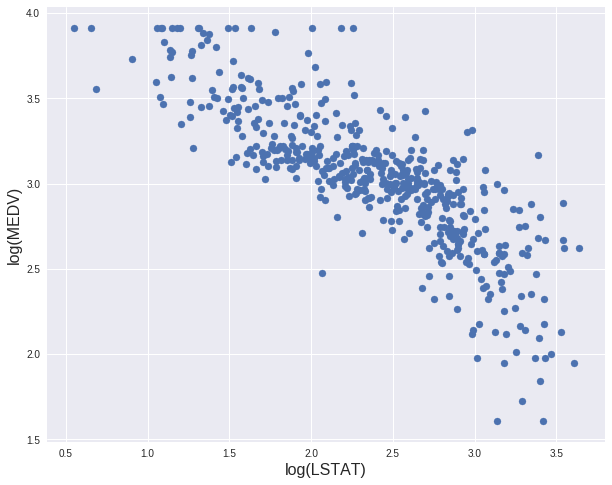

In [4]:
fig = pyplot.figure(figsize=(10, 8))

# 対数をとって、散布図をプロットする
pyplot.scatter(numpy.log(df['LSTAT'].values), numpy.log(df['MEDV'].values))

pyplot.xlabel('log(LSTAT)', fontsize=16)
pyplot.ylabel('log(MEDV)', fontsize=16)
pyplot.show()

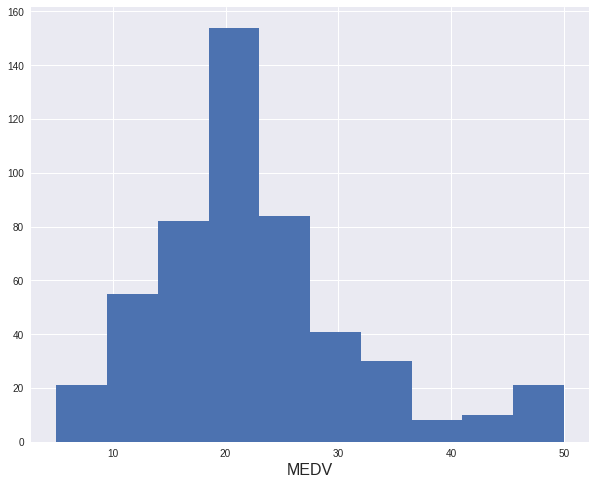

In [5]:
fig = pyplot.figure(figsize=(10, 8))

# ヒストグラムのプロット
pyplot.hist(df['MEDV'].values)

pyplot.xlabel('MEDV', fontsize=16)
pyplot.show()

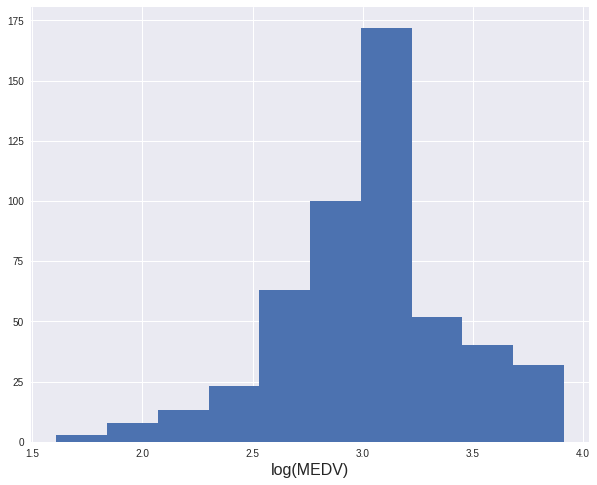

In [6]:
fig = pyplot.figure(figsize=(10, 8))

# numpy.log を使って対数を計算し、ヒストグラムのプロット
pyplot.hist(numpy.log(df['MEDV'].values))

pyplot.xlabel('log(MEDV)', fontsize=16)
pyplot.show()

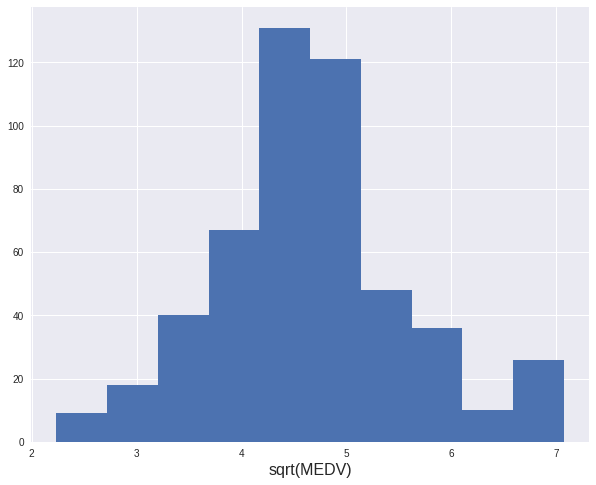

In [7]:
fig = pyplot.figure(figsize=(10, 8))

# numpy.sqrt を使って平方根を計算し、ヒストグラムのプロット
pyplot.hist(numpy.sqrt(df['MEDV'].values))

pyplot.xlabel('sqrt(MEDV)', fontsize=16)
pyplot.show()

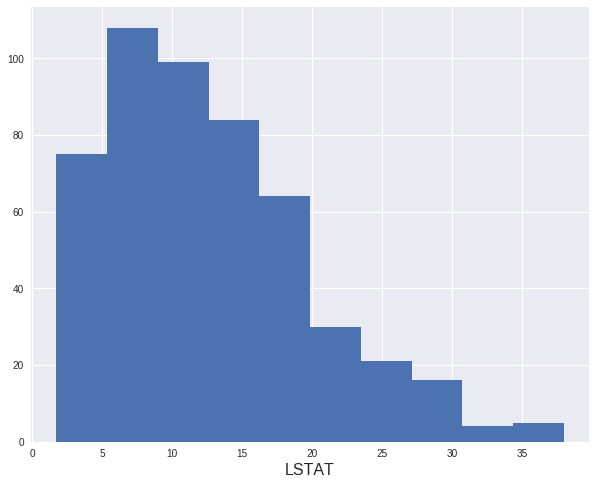

In [8]:
fig = pyplot.figure(figsize=(10, 8))

# ヒストグラムのプロット
pyplot.hist(df['LSTAT'].values)

pyplot.xlabel('LSTAT', fontsize=16)
pyplot.show()

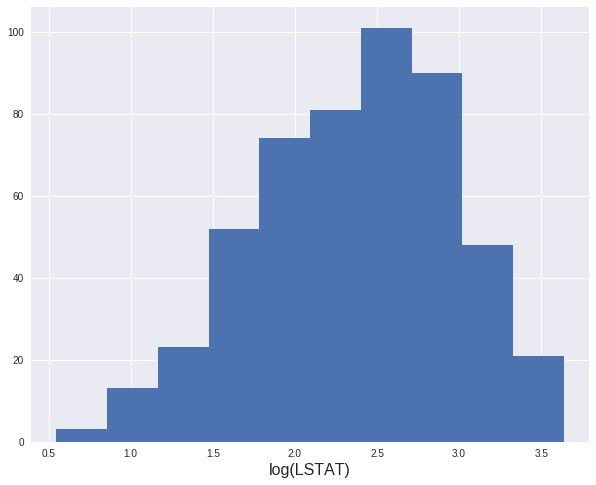

In [9]:
fig = pyplot.figure(figsize=(10, 8))

# numpy.log を使って対数を計算し、プロットする
pyplot.hist(numpy.log(df['LSTAT'].values))

pyplot.xlabel('log(LSTAT)', fontsize=16)
pyplot.show()


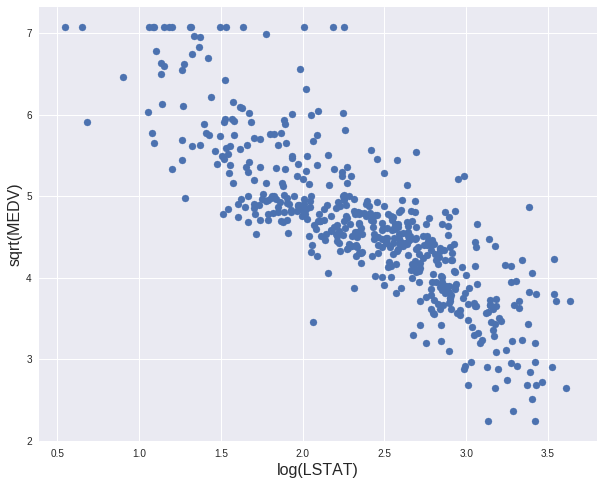

In [10]:
fig = pyplot.figure(figsize=(10, 8))

# 散布図のプロット
pyplot.scatter(numpy.log(df['LSTAT'].values), numpy.sqrt(df['MEDV'].values))

pyplot.xlabel('log(LSTAT)', fontsize=16)
pyplot.ylabel('sqrt(MEDV)', fontsize=16)
pyplot.show()

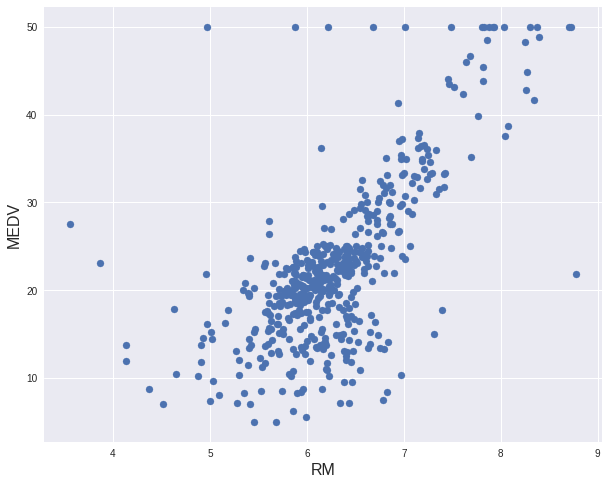

In [11]:
fig = pyplot.figure(figsize=(10, 8))

# 散布図のプロット
pyplot.scatter(df['RM'].values, df['MEDV'].values)

pyplot.xlabel('RM', fontsize=16)
pyplot.ylabel('MEDV', fontsize=16)
pyplot.show()

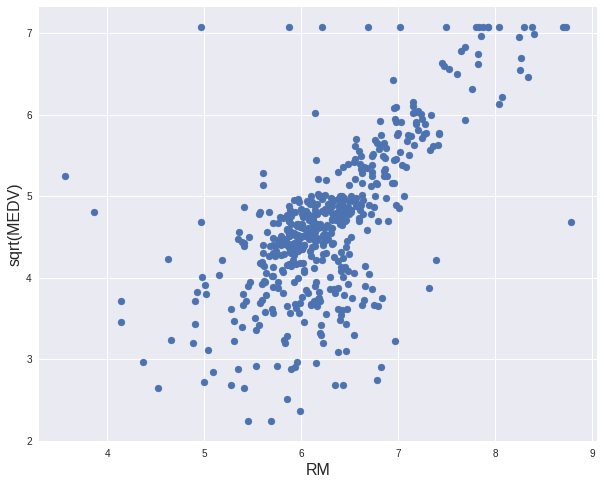

In [12]:
fig = pyplot.figure(figsize=(10, 8))

# 散布図のプロット
pyplot.scatter(df['RM'].values, numpy.sqrt(df['MEDV'].values))

pyplot.xlabel('RM', fontsize=16)
pyplot.ylabel('sqrt(MEDV)', fontsize=16)
pyplot.show()

In [13]:
df[['RM', 'LSTAT', 'MEDV']].head()

,RM,LSTAT,MEDV
0,6.575,4.98,24.0
1,6.421,9.14,21.6
2,7.185,4.03,34.7
3,6.998,2.94,33.4
4,7.147,5.33,36.2


In [0]:
df['LSTAT'] = df['LSTAT'].apply(numpy.log)  # 対数を計算する
df['MEDV'] = df['MEDV'].apply(numpy.sqrt)  # 平方根を計算する


In [15]:
df[['RM', 'LSTAT', 'MEDV']].head()

,RM,LSTAT,MEDV
0,6.575,1.605430,4.898979
1,6.421,2.212660,4.647580
2,7.185,1.393766,5.890671
3,6.998,1.078410,5.779273
4,7.147,1.673351,6.016644


In [0]:
X = df[['RM', 'LSTAT']].values
y = df['MEDV'].values


In [0]:
from sklearn.model_selection import train_test_split


In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)


In [0]:
X_train0 = X_train[:, 0].reshape(-1, 1)  # 訓練データのRM
X_train1 = X_train[:, 1].reshape(-1, 1)  # 訓練データのLSTAT
X_test0 = X_test[:, 0].reshape(-1, 1)  # テストデータのRM
X_test1 = X_test[:, 1].reshape(-1, 1)  # テストデータのLSTAT

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
# RM はこれまで通りの標準化
standerd_scaler1 = StandardScaler()
X_train_scaled0 = standerd_scaler1.fit_transform(X_train0)
X_test_scaled0 = standerd_scaler1.transform(X_test0)

In [0]:
# 新しい LSTAT にも標準化を適用する
standerd_scaler2 = StandardScaler()
X_train_scaled1 = standerd_scaler2.fit_transform(X_train1)
X_test_scaled1 = standerd_scaler2.transform(X_test1)

In [0]:
X_train_scaled = numpy.zeros(X_train.shape)
X_train_scaled[:, 0] = X_train_scaled0.reshape(-1)
X_train_scaled[:, 1] = X_train_scaled1.reshape(-1)

In [0]:
X_test_scaled = numpy.zeros(X_test.shape)
X_test_scaled[:, 0] = standerd_scaler1.transform(X_test0).reshape(-1)
X_test_scaled[:, 1] = standerd_scaler2.transform(X_test1).reshape(-1)

In [0]:
from sklearn.linear_model import SGDRegressor

In [0]:
reg1 = SGDRegressor(loss='squared_loss', max_iter=2000, tol=1e-3, penalty='none', random_state=42)

In [27]:
reg1.fit(X_train_scaled1, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=2000,
       n_iter=None, n_iter_no_change=5, penalty='none', power_t=0.25,
       random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [28]:
reg1.score(X_train_scaled1, y_train)

0.7019900164215708

In [29]:
reg1.score(X_test_scaled1, y_test)

0.6523882757986906

In [0]:
# テストデータの予測値
y_pred = reg1.predict(X_test_scaled1)

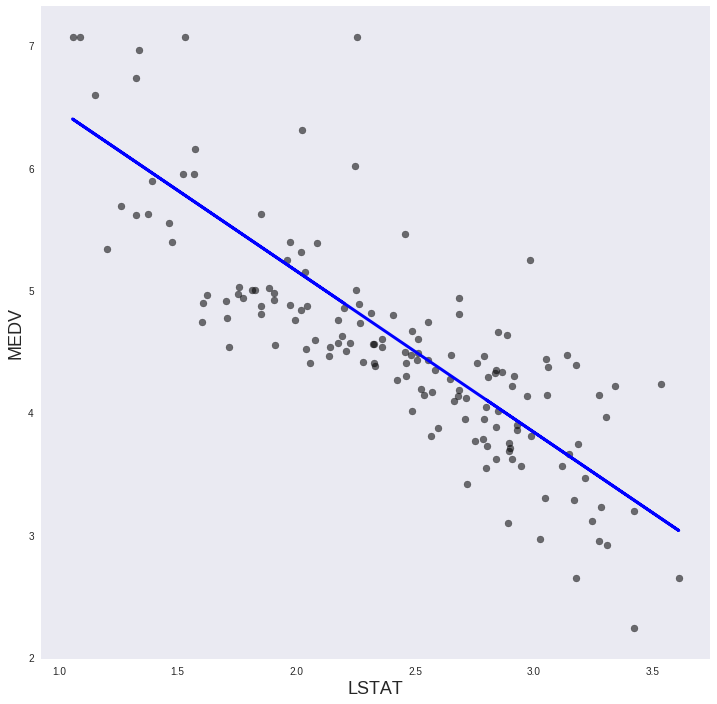

In [31]:
fig = pyplot.figure(figsize=(12, 12))
pyplot.scatter(X_test1, y_test, color='black', alpha=0.55)
pyplot.plot(X_test1, y_pred, linewidth=3, color='blue')
pyplot.xlabel("LSTAT", fontsize=18)
pyplot.ylabel("MEDV", fontsize=18)
pyplot.grid()
pyplot.show()

In [0]:
reg = SGDRegressor(loss='squared_loss', max_iter=1000, tol=1e-3, penalty='none', random_state=42)

In [33]:
reg.fit(X_train_scaled, y_train)

SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
       eta0=0.01, fit_intercept=True, l1_ratio=0.15,
       learning_rate='invscaling', loss='squared_loss', max_iter=1000,
       n_iter=None, n_iter_no_change=5, penalty='none', power_t=0.25,
       random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
       verbose=0, warm_start=False)

In [34]:
reg.score(X_train_scaled, y_train)

0.7243574942545064

In [35]:
reg.score(X_test_scaled, y_test)

0.6910445589072797